# Outreach Orchestrator - Results Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('/home/mikhail/Documents/code/Agents/outreach_orchestrator/data/input/leads_it_support_manager.csv')

In [3]:
page_id = 14
print(
    f'''
EMAIL:     {df.iloc[page_id]["Email"]}
LinkedIn:  {df.iloc[page_id]["linkedIn"]}
    '''
)


EMAIL:     claudia.hernandez@midtown.com
LinkedIn:  linkedin.com/in/claudiavhernandez
    


## Load Data

In [4]:
df = pd.read_csv('../data/output/results.csv')
df['processed_at'] = pd.to_datetime(df['processed_at'])

print(f"Total leads: {len(df)}")
df.head()

Total leads: 19


,email,name,company,job_title,linkedin_url,stage1_relevant,stage1_reason,stage2_status,stage2_rejected,stage2_rejection_reason,letter_subject,letter_body,letter_send_time_msk,personalization_signals,relevance_assessment,notes,final_status,error,processed_at
0,collin.shaw@equipmentshare.com,Collin,Emery Sapp & Sons,IT Support Manager,linkedin.com/in/collin-shaw-214410284,Yes,IT Support Manager role aligns with target ICP...,completed,No,NaN,Support transition,collin.shaw@equipmentshare.com\n\n18:30 MSK (T...,18:30 MSK (Tuesday),NaN,MEDIUM,Both variants use the email/company mismatch a...,success,NaN,2025-11-03 22:13:11
1,nmath@visionaryhomes.com,Nikhil,Visionary Homes,IT Support Manager,linkedin.com/in/nikhil-math,Yes,IT Support Manager role aligns with target dec...,completed,No,NaN,Resolution gaps,nmath@visionaryhomes.com\n\n18:45 MSK (Tuesday...,18:45 MSK (Tuesday),NaN,MEDIUM,Variant 2 goes deeper into the homebuilding co...,success,NaN,2025-11-03 22:13:13
2,chrystal_laiuvara@comcast.com,Chrystal,Comcast Advertising,IT Support Manager,linkedin.com/in/chrystal-laiuvara-49826392,Yes,IT Support Manager role aligns with target ICP...,completed,No,NaN,Ticket bouncing,chrystal_laiuvara@comcast.com\n\n18:00 MSK (Tu...,18:00 MSK (Tuesday),NaN,MEDIUM,Only one variant provided. It anchors on Comca...,success,NaN,2025-11-03 22:13:02
3,kchagnon@eh2.com,Karen,Electric Hydrogen,IT Support Manager,linkedin.com/in/karen-c-7983b425a,Yes,IT Support Manager role directly matches targe...,completed,No,NaN,Shift handoffs,kchagnon@eh2.com\n\n17:30 MSK (Tuesday)\n\nShi...,17:30 MSK (Tuesday),NaN,MEDIUM,"Only one variant provided, and it’s strong: it...",success,NaN,2025-11-03 22:15:15
4,claudia.hernandez@midtown.com,Claudia,Midtown Athletic Clubs,IT Support Manager,linkedin.com/in/claudiavhernandez,Yes,IT Support Manager role aligns with target dec...,completed,No,NaN,January surge,claudia.hernandez@midtown.com\n\n18:30 MSK (Tu...,18:30 MSK (Tuesday),NaN,MEDIUM,Both are strong and within 1 point. Using tie-...,success,NaN,2025-11-03 22:15:13


In [27]:
print(df.letter_body.iloc[19])

IndexError: single positional indexer is out-of-bounds

In [6]:
print(df.iloc[0].letter_body)

collin.shaw@equipmentshare.com

18:30 MSK (Tuesday)

Support transition

Saw your email is @equipmentshare.com while your title lists Emery Sapp & Sons.

In my experience, that signals a recent transition or shared IT ops—exactly when support processes wobble. In construction with distributed crews, this usually exposes soft spots: onboarding/offboarding handoffs, device assignments, and resolution know‑how living in people’s heads. Issue is, ownership blurs, tickets bounce or get closed half-solved, and new agents re-solve old problems. Catching it early keeps field teams productive.

Explored knowledge-driven ticket closure before?

Michael


## Funnel

In [7]:
total = len(df)
stage1_relevant = len(df[df['stage1_relevant'] == 'Yes'])
stage2_completed = len(df[df['stage2_status'] == 'completed'])
success = len(df[df['final_status'] == 'success'])

print(f"Total leads:        {total}")
print(f"Stage 1 relevant:   {stage1_relevant} ({stage1_relevant/total*100:.1f}%)")
print(f"Stage 2 completed:  {stage2_completed} ({stage2_completed/total*100:.1f}%)")
print(f"Final success:      {success} ({success/total*100:.1f}%)")

Total leads:        19
Stage 1 relevant:   19 (100.0%)
Stage 2 completed:  19 (100.0%)
Final success:      17 (89.5%)


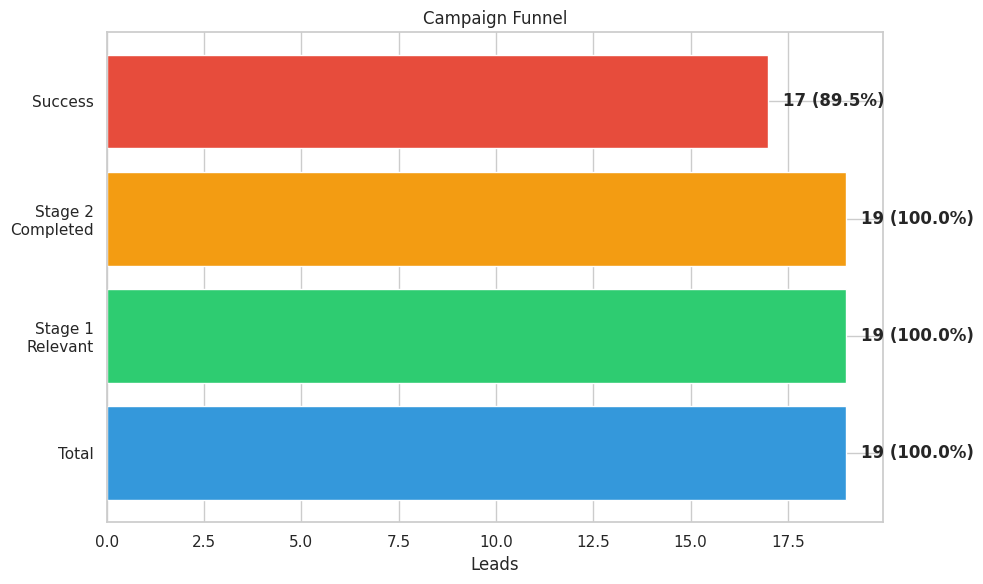

In [8]:
# Funnel visualization
stages = ['Total', 'Stage 1\nRelevant', 'Stage 2\nCompleted', 'Success']
values = [total, stage1_relevant, stage2_completed, success]

fig, ax = plt.subplots()
bars = ax.barh(stages, values, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])

for i, (bar, val) in enumerate(zip(bars, values)):
    pct = (val/total*100) if i > 0 else 100
    ax.text(val + max(values)*0.02, i, f'{val} ({pct:.1f}%)', va='center', fontweight='bold')

ax.set_xlabel('Leads')
ax.set_title('Campaign Funnel')
plt.tight_layout()
plt.show()

## Status Breakdown

In [9]:
print("Final status:")
print(df['final_status'].value_counts())

print("\nStage 2 status:")
print(df['stage2_status'].value_counts())

Final status:
final_status
success                17
not_relevant_stage2     2
Name: count, dtype: int64

Stage 2 status:
stage2_status
completed    19
Name: count, dtype: int64


## Top Rejection Reasons

In [10]:
# Stage 1 rejections
rejected = df[df['stage1_relevant'] == 'No']
print(f"Stage 1 rejected: {len(rejected)}\n")
print(rejected['stage1_reason'].value_counts().head(10))

Stage 1 rejected: 0

Series([], Name: count, dtype: int64)


## Errors

In [11]:
errors = df[df['error'].notna()]
print(f"Errors: {len(errors)} ({len(errors)/len(df)*100:.1f}%)")

if len(errors) > 0:
    print("\nError types:")
    print(errors['error'].value_counts())

Errors: 0 (0.0%)
